In [1]:
from dataclasses import dataclass

import matplotlib.pyplot as plt

from flying_discs.morrison.disc_morrison_base import DiscMorrison
from flying_discs.morrison.disc_morrison_bezier import DiscMorrisonBezier
from flying_discs.morrison.disc_morrison_linear import DiscMorrisonLinear
from flying_discs.morrison.morrison_constants import DiscMorrisonUltrastar, DiscMorrisonUltrastarCode

# Base

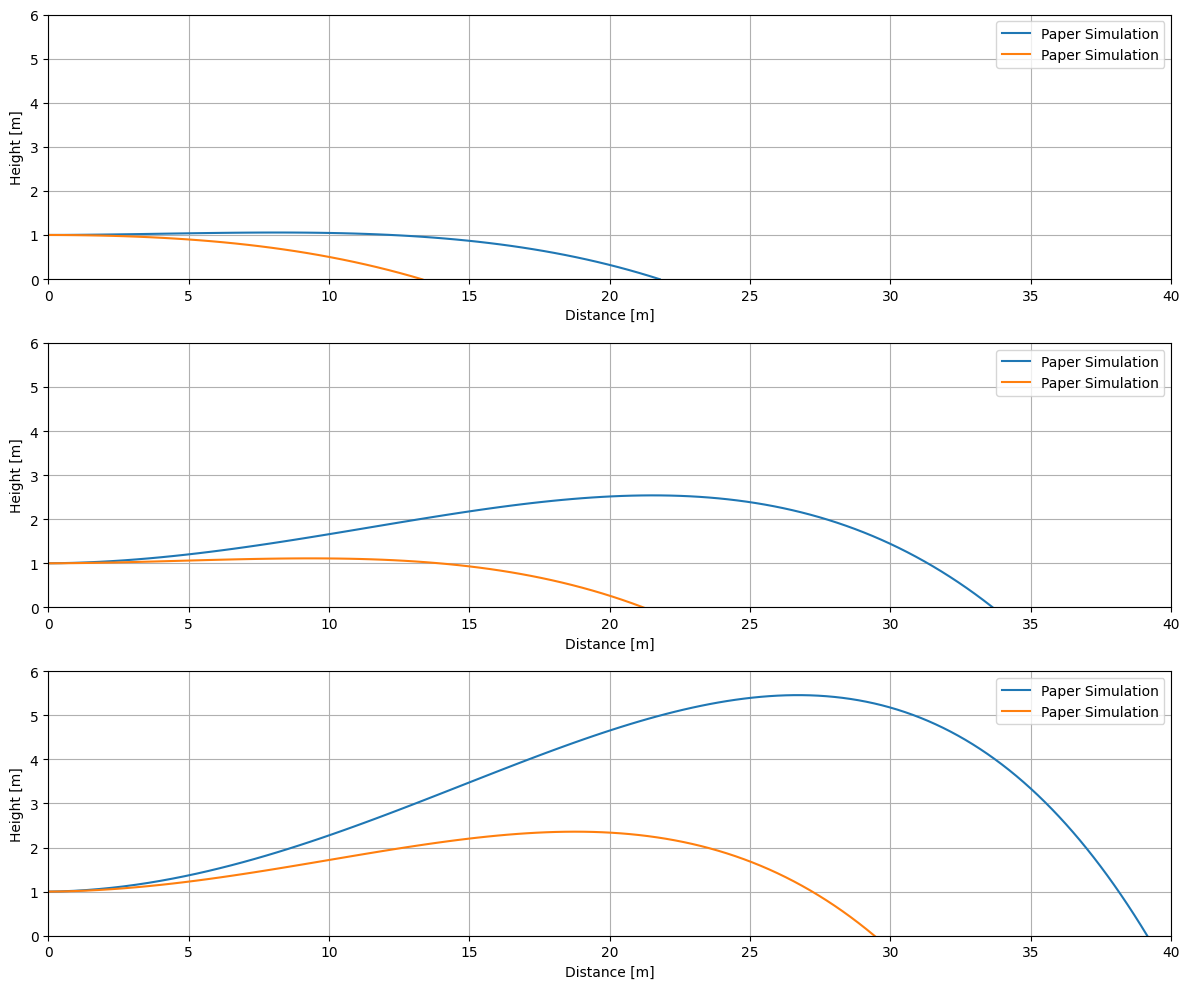

In [2]:
@dataclass
class Experiment:
    alpha: float
    v0: float
    timescale = 0.033
    direction = 0


experiments = [Experiment(5, 14), Experiment(7.5, 14), Experiment(10, 14)]
fig = plt.figure(figsize=(12, 10))
for i, experiment in enumerate(experiments):
    ax = fig.add_subplot(3, 1, i + 1)
    disc = DiscMorrison(DiscMorrisonUltrastar(), 0, 0, 1)
    disc.calculate_trajectory(experiment.timescale, alpha=experiment.alpha, power=experiment.v0)
    ax.plot([p.y for p in disc.trajectory], [p.z for p in disc.trajectory], label="Paper Simulation")
    disc = DiscMorrison(DiscMorrisonUltrastarCode(), 0, 0, 1)
    disc.calculate_trajectory(experiment.timescale, alpha=experiment.alpha, power=experiment.v0)
    ax.plot([p.y for p in disc.trajectory], [p.z for p in disc.trajectory], label="Paper Simulation")

    ax.set_xlim([0, 40])
    ax.set_ylim([0, 6])
    ax.set_xlabel("Distance [m]")
    ax.set_ylabel("Height [m]")
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()

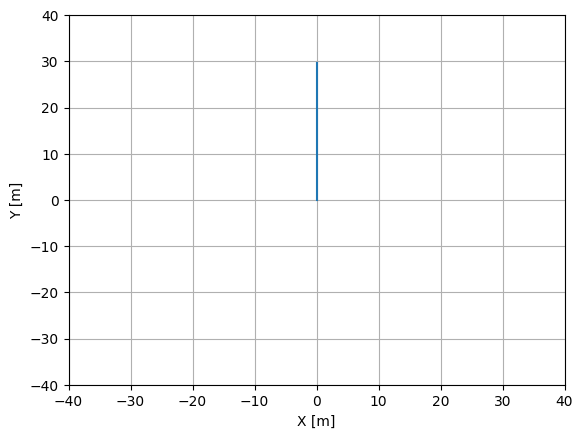

In [3]:
plt.plot([p.x for p in disc.trajectory], [p.y for p in disc.trajectory])
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.grid()
plt.show()

# Linear

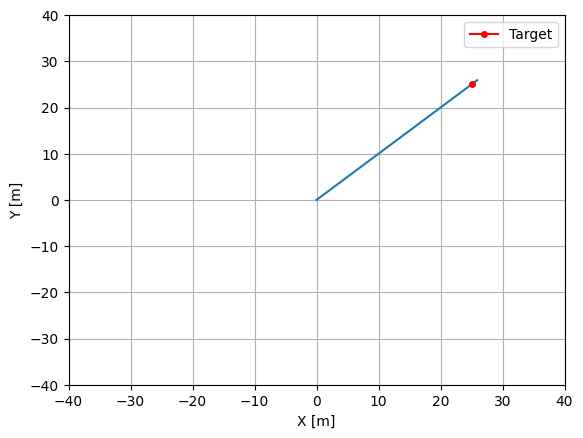

In [4]:
TARGET_X = 25
TARGET_Y = 25
disc = DiscMorrisonLinear(DiscMorrisonUltrastar(), 0, 0, 1)
trajectory = disc.calculate_trajectory_to_position(TARGET_X, TARGET_Y, 0.033)

plt.plot([p.x for p in trajectory], [p.y for p in trajectory])
plt.plot([TARGET_X], [TARGET_Y], marker="o", markersize=4, color="red", label="Target")
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
plt.grid()
plt.show()

# Bezier

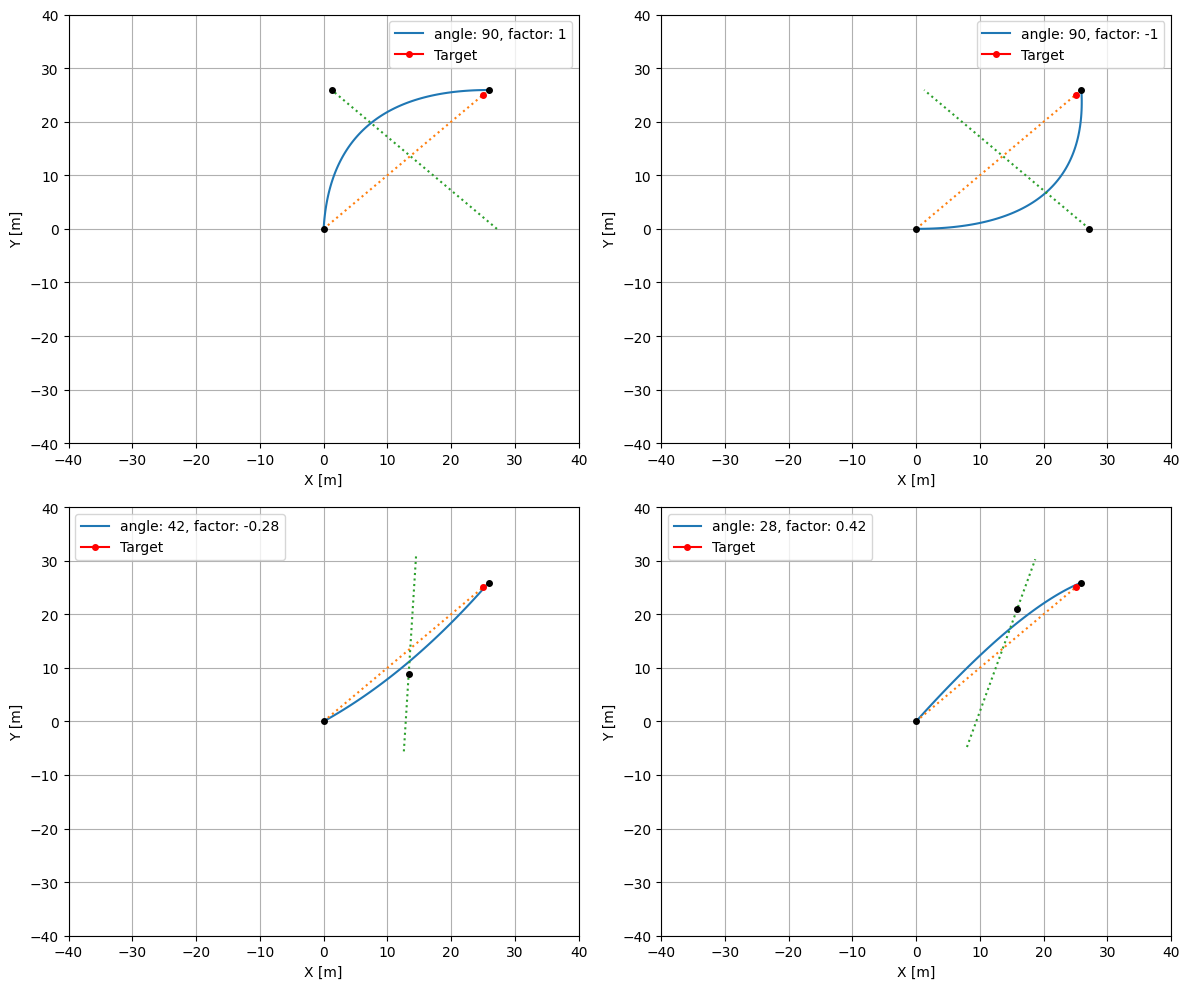

In [5]:
@dataclass
class BezierExperiment:
    rotation_angle: float
    factor: float


bezier_experiments = [
    BezierExperiment(90, 1),
    BezierExperiment(90, -1),
    BezierExperiment(42, -0.28),
    BezierExperiment(28, 0.42),
]

fig = plt.figure(figsize=(12, 10))
for i, bezier_experiment in enumerate(bezier_experiments):
    ax = fig.add_subplot(2, 2, i + 1)
    disc = DiscMorrisonBezier(DiscMorrisonUltrastar(), 0, 0, 1)
    disc.calculate_trajectory_to_position(
        TARGET_X, TARGET_Y, 0.033, rotation_angle=bezier_experiment.rotation_angle, factor=bezier_experiment.factor
    )
    ax.plot(
        [p.x for p in disc.trajectory],
        [p.y for p in disc.trajectory],
        label=f"angle: {str(bezier_experiment.rotation_angle)}, factor: {str(bezier_experiment.factor)}",
    )
    ax.plot([p.x for p in disc._linear_trajectory], [p.y for p in disc._linear_trajectory], linestyle="dotted")
    ax.plot([p[0] for p in disc._rotated_points], [p[1] for p in disc._rotated_points], linestyle="dotted")
    for point in disc._bezier_points:
        ax.plot([point[0]], [point[1]], marker="o", markersize=4, color="black")
    ax.plot([TARGET_X], [TARGET_Y], marker="o", markersize=4, color="red", label="Target")
    ax.set_xlim([-40, 40])
    ax.set_ylim([-40, 40])
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Y [m]")
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()